# Save and load results as HDF5 files

In [8]:
import pypesto
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pypesto.storage import (save_to_hdf5, read_from_hdf5)
import tempfile

%matplotlib inline

## Define the objective and problem

In [9]:
# first type of objective
objective = pypesto.Objective(fun=sp.optimize.rosen, 
                               grad=sp.optimize.rosen_der, 
                               hess=sp.optimize.rosen_hess)


dim_full = 10
lb = -5 * np.ones((dim_full, 1))
ub = 5 * np.ones((dim_full, 1))

problem = pypesto.Problem(objective=objective, lb=lb, ub=ub)

## Run optimization

In [10]:
# create optimizers
optimizer = pypesto.ScipyOptimizer(method='l-bfgs-b')

# set number of starts
n_starts = 20

# Run optimizaitons for different optimzers
result = pypesto.minimize(
    problem=problem, optimizer=optimizer,
    n_starts=n_starts)

In [11]:
result.optimize_result.list

[{'id': '11',
  'x': array([0.99999999, 0.99999995, 0.99999995, 1.00000002, 1.00000006,
         1.00000009, 1.00000004, 1.00000007, 1.00000032, 1.00000068]),
  'fval': 6.814602102988066e-12,
  'grad': array([ 8.54356262e-06, -2.14014754e-05, -4.46912200e-05,  2.33066285e-05,
          1.21700482e-05,  4.61617019e-05, -2.04791100e-05, -6.90629147e-05,
          1.63976143e-05,  8.79120470e-06]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 85,
  'n_grad': 85,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([0.99999999, 0.99999995, 0.99999995, 1.00000002, 1.00000006,
         1.00000009, 1.00000004, 1.00000007, 1.00000032, 1.00000068]),
  'fval0': 245398.23978983215,
  'trace': None,
  'exitflag': 0,
  'time': 0.015172481536865234,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '6',
  'x': array([1.00000005, 1.00000009, 0.99999997, 0.99999996, 0.9999999 ,
         0.99999982, 0.99999974, 0.99999953, 0.99999905, 0.99999809]),
  'fval': 7

## Plot results

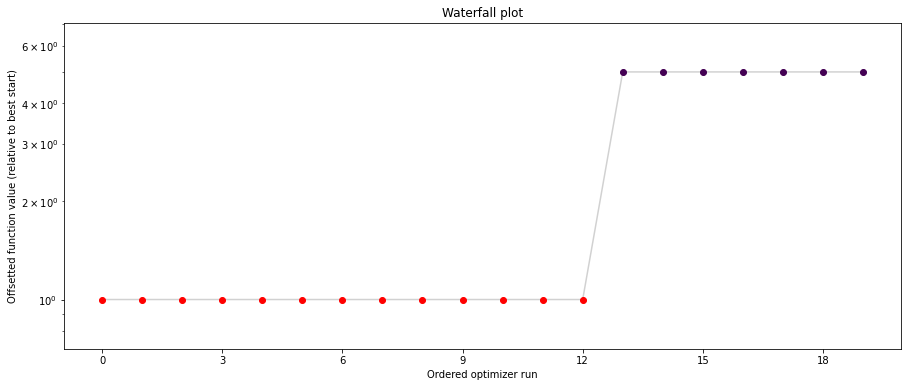

In [12]:
import pypesto.visualize

# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

## Save optimization result as HDF5 file

In [13]:
fn = tempfile.mktemp(".hdf5")

# Write result
hdf5_writer = save_to_hdf5.OptimizationResultHDF5Writer(fn)
hdf5_writer.write(result)

# Write problem
hdf5_writer = save_to_hdf5.ProblemHDF5Writer(fn)
hdf5_writer.write(problem)

In [14]:
hdf5_reader = read_from_hdf5.OptimizationResultHDF5Reader(fn)
result = hdf5_reader.read()

lb
<HDF5 dataset "lb": shape (10,), type "<f8">
lb_full
<HDF5 dataset "lb_full": shape (10,), type "<f8">
ub
<HDF5 dataset "ub": shape (10,), type "<f8">
ub_full
<HDF5 dataset "ub_full": shape (10,), type "<f8">
x_fixed_indices
<HDF5 dataset "x_fixed_indices": shape (0,), type "<i4">
x_fixed_values
<HDF5 dataset "x_fixed_values": shape (0,), type "<f8">
x_names
<HDF5 dataset "x_names": shape (10,), type "|O">


IndexError: invalid index to scalar variable.

In [15]:
result.optimize_result.list

[{'id': '11',
  'x': array([0.99999999, 0.99999995, 0.99999995, 1.00000002, 1.00000006,
         1.00000009, 1.00000004, 1.00000007, 1.00000032, 1.00000068]),
  'fval': 6.814602102988066e-12,
  'grad': array([ 8.54356262e-06, -2.14014754e-05, -4.46912200e-05,  2.33066285e-05,
          1.21700482e-05,  4.61617019e-05, -2.04791100e-05, -6.90629147e-05,
          1.63976143e-05,  8.79120470e-06]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 85,
  'n_grad': 85,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([0.99999999, 0.99999995, 0.99999995, 1.00000002, 1.00000006,
         1.00000009, 1.00000004, 1.00000007, 1.00000032, 1.00000068]),
  'fval0': 245398.23978983215,
  'trace': None,
  'exitflag': 0,
  'time': 0.015172481536865234,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '6',
  'x': array([1.00000005, 1.00000009, 0.99999997, 0.99999996, 0.9999999 ,
         0.99999982, 0.99999974, 0.99999953, 0.99999905, 0.99999809]),
  'fval': 7

## Plot results

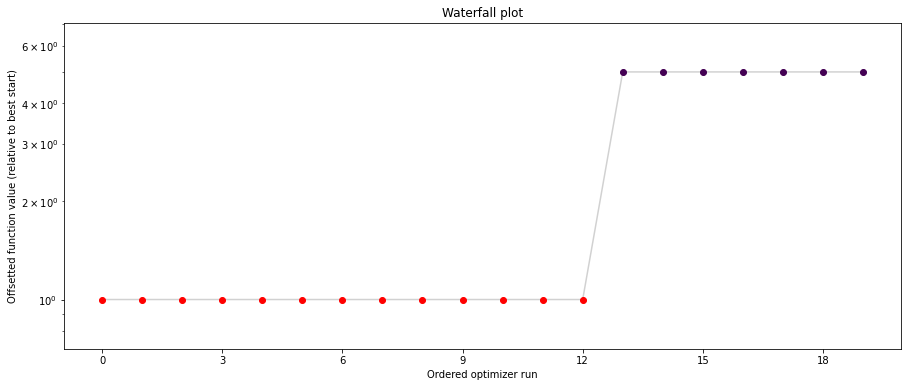

In [16]:
# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

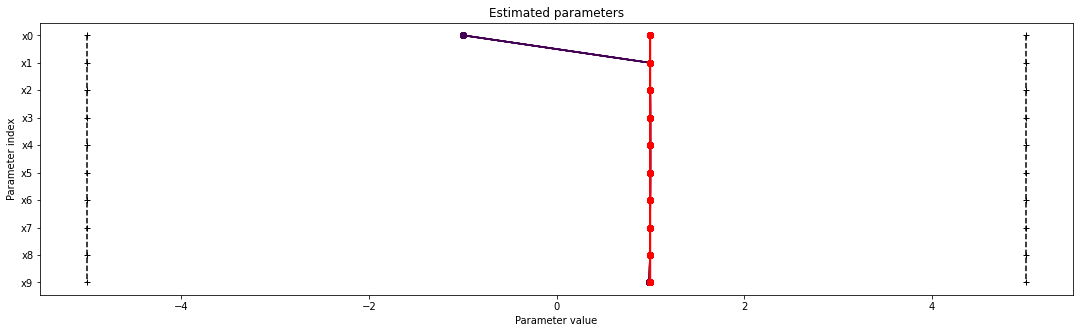

In [17]:
pypesto.visualize.parameters(result,
                            balance_alpha=False)